# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [1]:
import pandas as pd
df=pd.read_csv('pet_supplies_2212.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [2]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


# Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.


The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.


## Task 1



# Description of the dataset:

In [3]:
data=df.copy()

# **product_id**

This column has unique values of 1500 rows. No missing value

In [4]:
len(data.product_id.unique()) ==len(data)

True

# **category**

This column is a categorical column.The frequency of the category is listed down.

In [5]:
df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

The dataset contain the 6 category items with - also,which is the missing value.
We replace the '-' values with 'unknowm' as the category.

In [6]:
data['category'] = data['category'].replace('-', 'Unknown')

In [7]:
data.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

# **animal**

In [8]:
data.animal.value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

There is no missing values in this column

# **size**

In [9]:
data['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

This column also has no missing value.But the values are duplicated becuase of upper and lower cases.So, we change all the size column in lower case for further analysis.

In [10]:
data['size']=data['size'].str.lower()
data['size'].value_counts()

small     754
medium    492
large     254
Name: size, dtype: int64

# **price**

In [11]:
data.price.head()

0     51.1
1    35.98
2    31.23
3    24.95
4    26.18
Name: price, dtype: object

The price column has numeric values but the datatype is in object['string']. So, there may be presence of missing values.

In [12]:
data[data['price'].str.isalpha()]['price'].value_counts()

unlisted    150
Name: price, dtype: int64

This column contains 150 unlisted values which is 10% of the given dataset. 
We replace the unlisted values with overal median value without considering which category it belong.

In [13]:
import numpy as np
data['price']=data['price'].replace('unlisted',0)
data['price'].fillna(data['price'].median(),inplace=True)
data['price']=np.round(np.array(data['price'],dtype='float'),2)
data['price'].dtype

dtype('float64')

In [14]:
data['price'].isnull().sum()

0

In [15]:
sum(data.price<0) # no negative values

0

# **sales**

In [16]:
data.sales.head()

0    1860.62
1     963.60
2     898.30
3     982.15
4     832.63
Name: sales, dtype: float64

Here sales are in the correct datatpe. So no issues with the missing values.

# **rating**

In [17]:
rating=data['rating'].value_counts()
print(rating)

print(rating.sum())

5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64
1350


In [18]:
len(data) - rating.sum()

150

Rating variable finds the frequency of the ratings column. There are 150 missing values.
So, we replace that with 0.

In [19]:
data['rating'].fillna(0,inplace=True)

data['rating'].value_counts().sum()-len(data)

0

Thus we replaced na values with 0.

# **repeat_purchase**

In [20]:
data.repeat_purchase.value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

The data is fine with 2 unique values.

In [21]:
data.repeat_purchase.value_counts().sum()-len(data)

0

No missing values.

In [22]:
data.describe(include='all')

,product_id,category,animal,size,price,sales,rating,repeat_purchase
count,1500.000000,1500,1500,1500,1500.000000,1500.000000,1500.000000,1500.000000
unique,NaN,7,4,3,NaN,NaN,NaN,NaN
top,NaN,Equipment,Cat,small,NaN,NaN,NaN,NaN
freq,NaN,370,567,754,NaN,NaN,NaN,NaN
mean,750.500000,NaN,NaN,NaN,26.481873,996.597847,4.492000,0.604000
std,433.157015,NaN,NaN,NaN,11.472570,323.952676,2.105443,0.489228
min,1.000000,NaN,NaN,NaN,0.000000,286.940000,0.000000,0.000000
25%,375.750000,NaN,NaN,NaN,22.910000,747.420000,3.000000,0.000000
50%,750.500000,NaN,NaN,NaN,27.930000,1000.830000,5.000000,1.000000
75%,1125.250000,NaN,NaN,NaN,33.142500,1158.157500,6.000000,1.000000


In [23]:
data.to_csv('final.csv')

## Task 2

Visualization

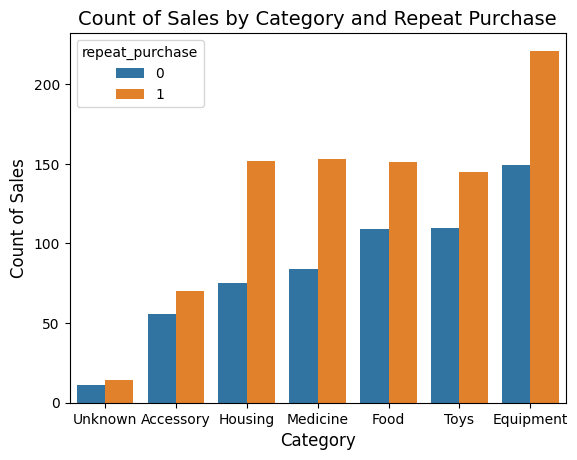

In [24]:
# Group the data by repeat_purchase, category, and calculate the count of sales for each group
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sales_by_repeat_purchase = data.groupby(['repeat_purchase', 'category'])['sales'].count().reset_index().sort_values(by='sales')

# Create a bar chart that shows the count of sales for each category, grouped by repeat_purchase
sns.barplot(x='category', y='sales', hue='repeat_purchase', data=sales_by_repeat_purchase)

# Add labels and title to the chart
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count of Sales', fontsize=12)
plt.title('Count of Sales by Category and Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

This graph tells us Equipment has the most number of sales in the category. 
At the same time, the data is not equally distributed [not balanced] with the repeat purchase.It is more baised towards the repeat_purchase.

## Task 3

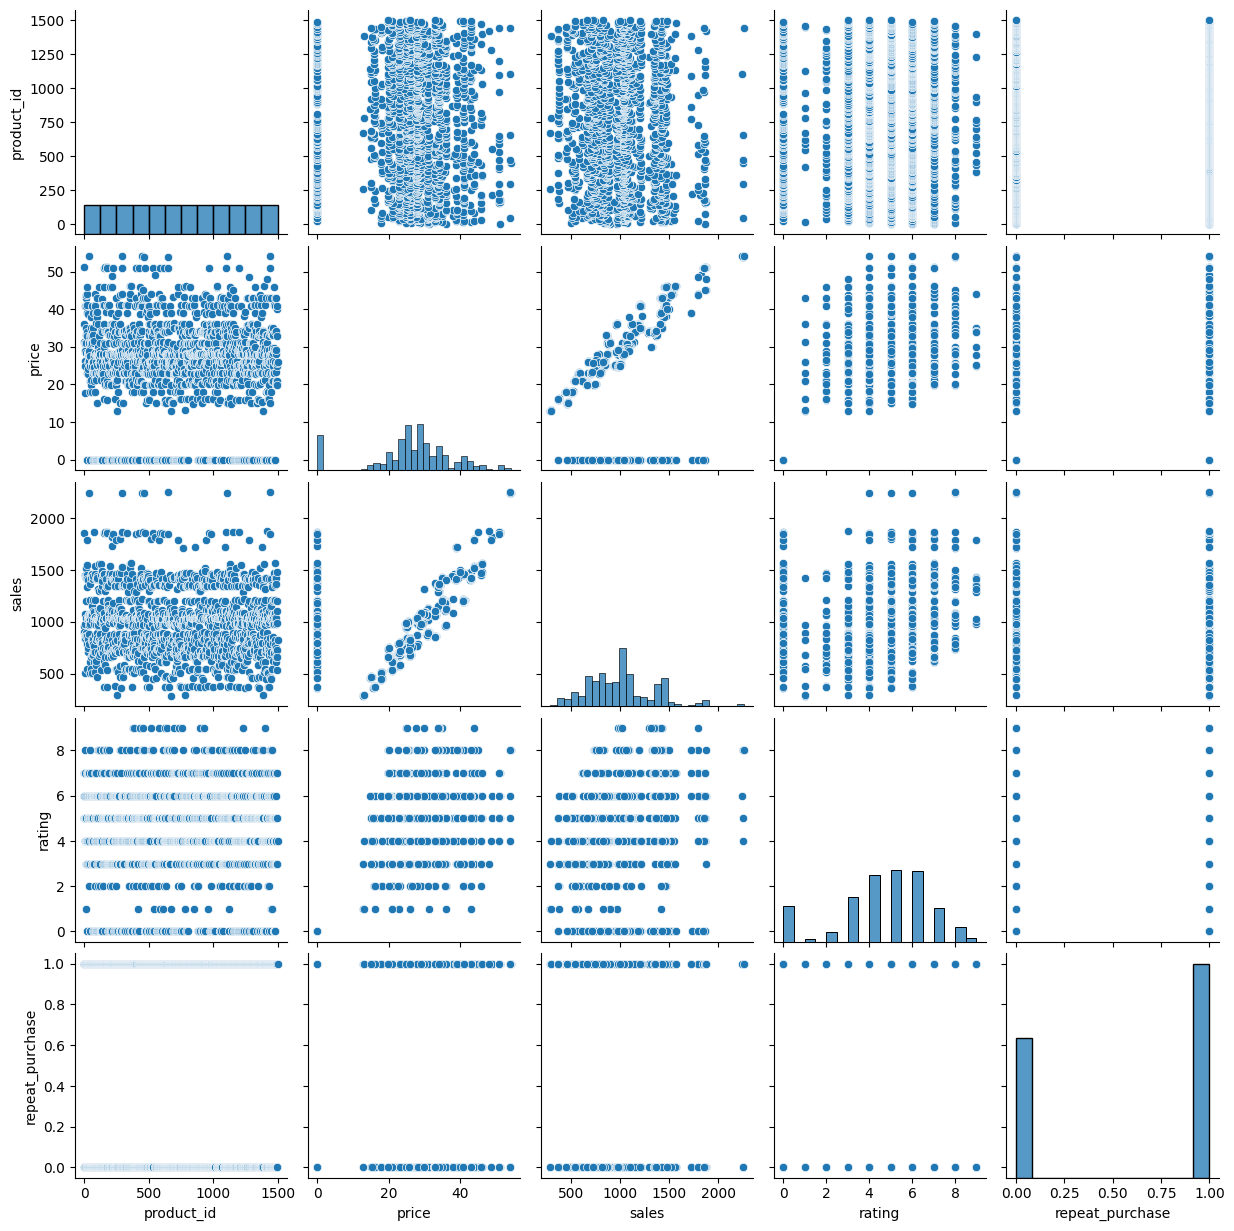

In [25]:
sns.pairplot(data)

This tells us the replacing the bull values of price with global median is giving wrong results

<AxesSubplot: xlabel='sales', ylabel='price'>

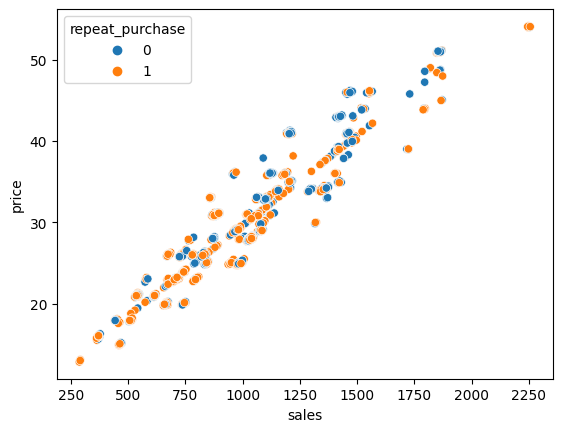

In [26]:
df['price']=df['price'].replace('unlisted',0)
df['price']=np.round(np.array(df['price'],dtype='float'),2)
from sklearn.linear_model import LinearRegression
mask=df['price']!=0
X=np.array(df.loc[df[mask].index,'sales']).reshape(-1,1)
y=df.loc[df[mask].index,'price']
model = LinearRegression()
model.fit(X, y)

null_mask = df['price']==0
null_indices = df[null_mask].index
df.loc[null_indices, 'price'] = model.predict(df.loc[null_mask, ['sales']])

import seaborn as sns

sns.scatterplot(data=df,x='sales',y='price',hue='repeat_purchase')

In [27]:
data['price']=df['price']

Thus we changed the null price values with according to its sales value.

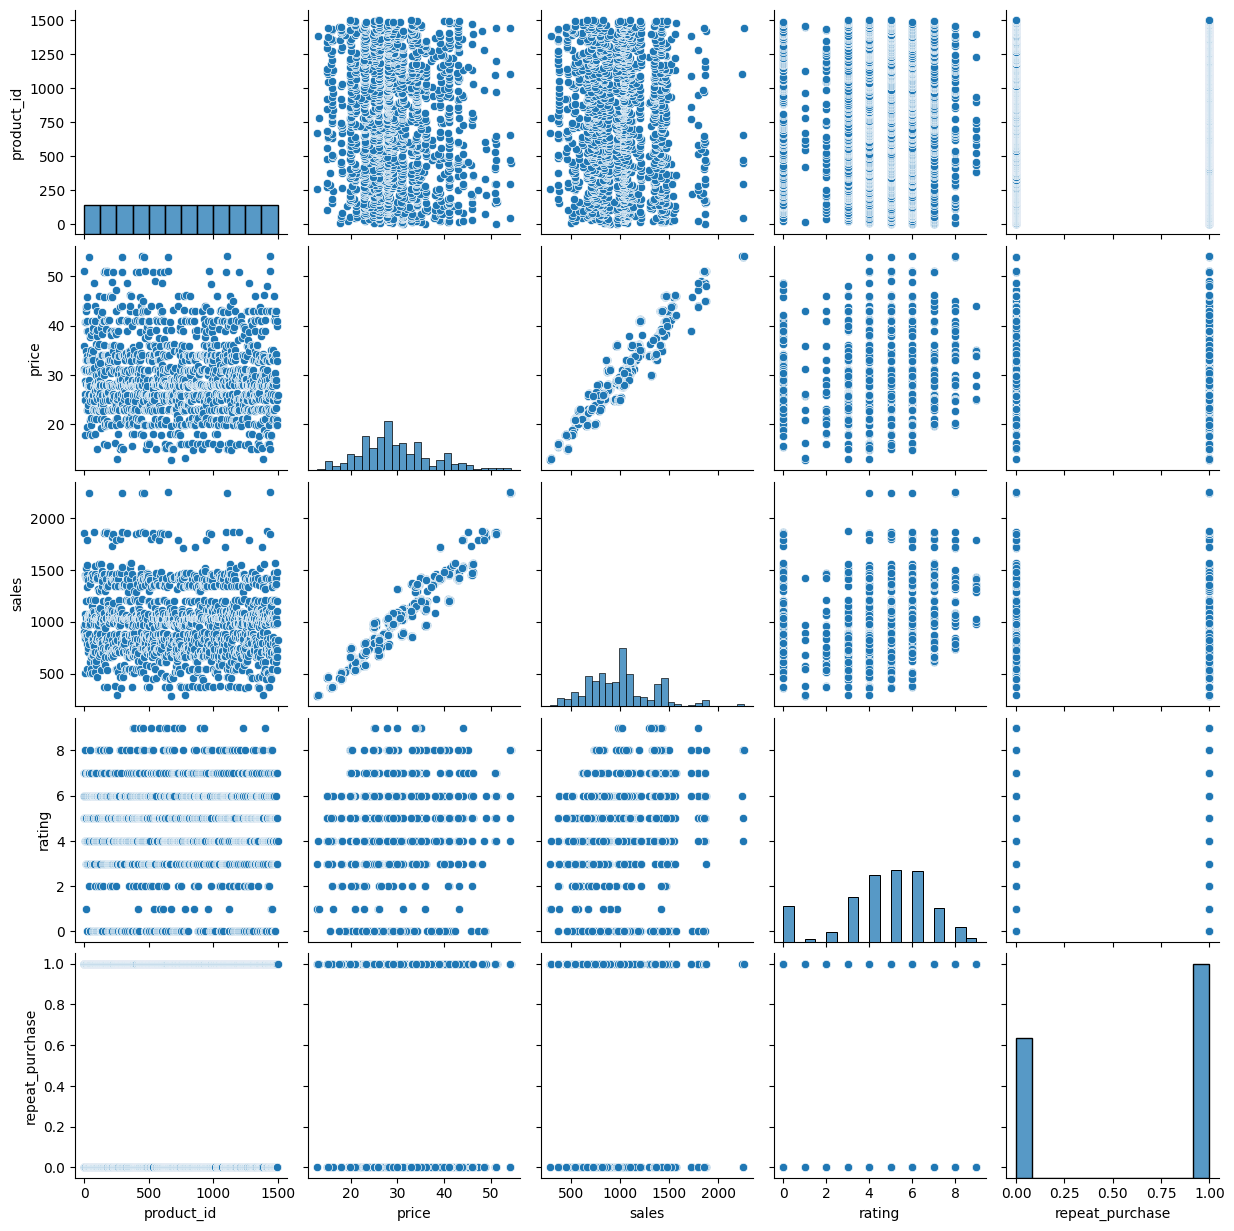

In [28]:
sns.pairplot(data)

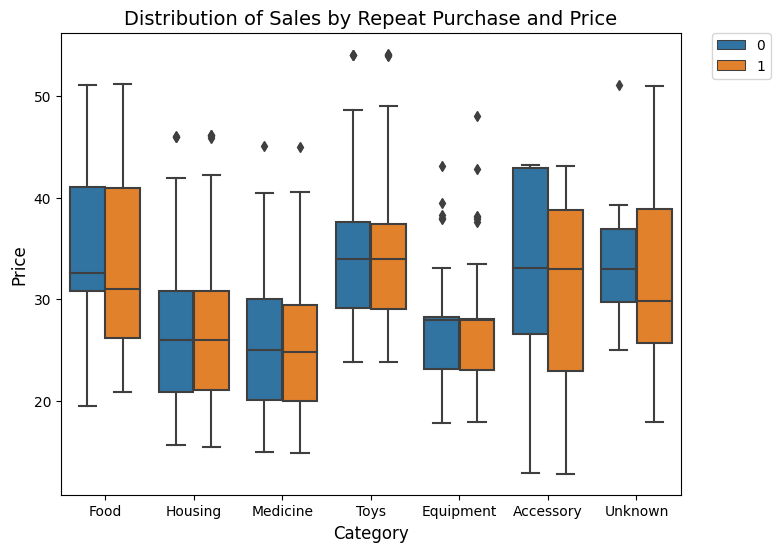

In [29]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot of the sales data, with repeat_purchase and category as hue
sns.boxplot(data=data, x='category', y='price', hue='repeat_purchase')

# Add labels and title to the chart
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Distribution of Sales by Repeat Purchase and Price', fontsize=14)

# Move the legend to the outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the chart
plt.show()

This tells that the category has equal distribution to repeat_purchase towards the number of sales.

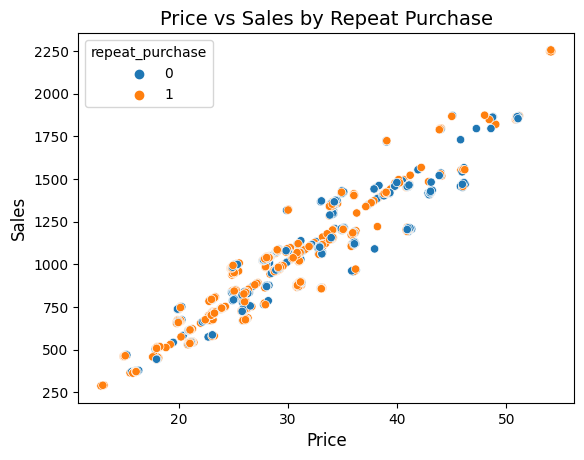

In [30]:

# Create a scatter plot of price and sales, with repeat_purchase as hue
sns.scatterplot(data=data, x='price',y='sales',hue='repeat_purchase')

# Add labels and title to the chart
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Price vs Sales by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

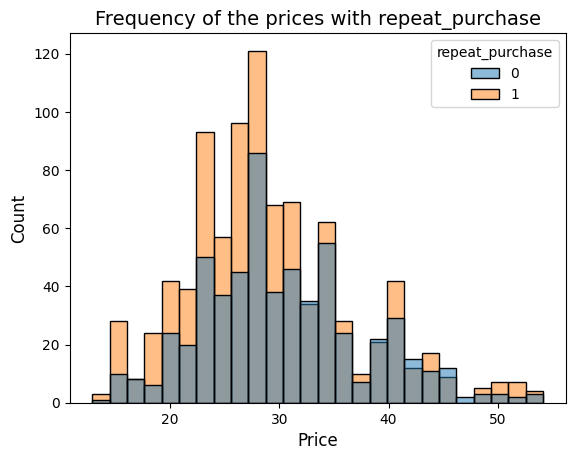

In [41]:

sns.histplot(data=data, x='price',hue='repeat_purchase')

# Add labels and title to the chart
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of the prices with repeat_purchase', fontsize=14)

# Show the chart
plt.show()

As the price increases the sales increases.We even notice the prices of the repeat_purchase are mostly less than 30.

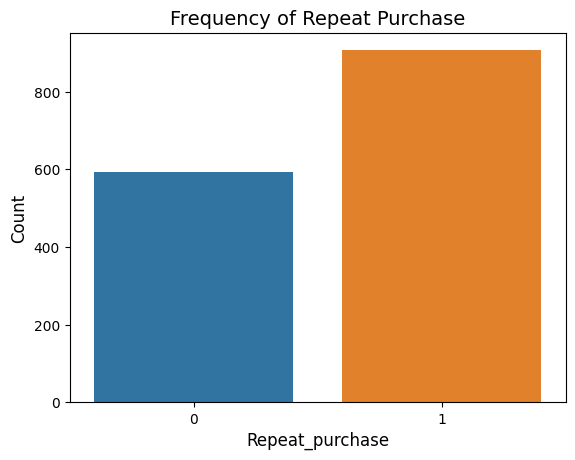

In [42]:
sns.countplot(x='repeat_purchase', data=data)
# Add labels and title to the chart
plt.xlabel('Repeat_purchase', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Repeat Purchase', fontsize=14)

# Show the chart

plt.show()

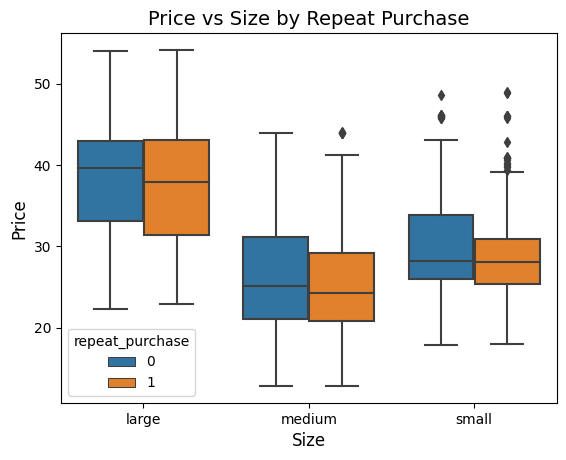

In [43]:
sns.boxplot(x='size',y='price',hue='repeat_purchase', data=data)

# Add labels and title to the chart
plt.xlabel('Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Size by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

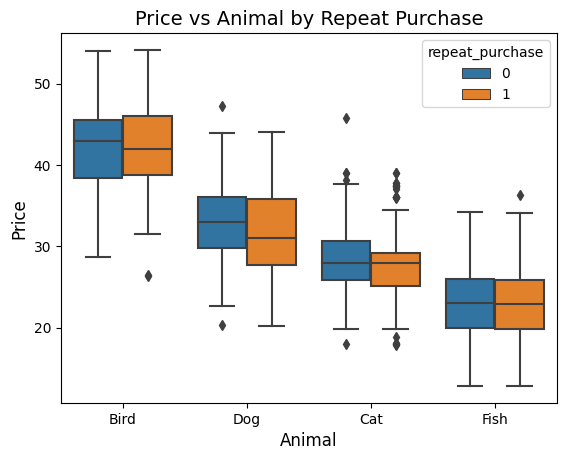

In [44]:
sns.boxplot(x='animal',y='price',hue='repeat_purchase', data=data)

# Add labels and title to the chart
plt.xlabel('Animal', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Animal by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

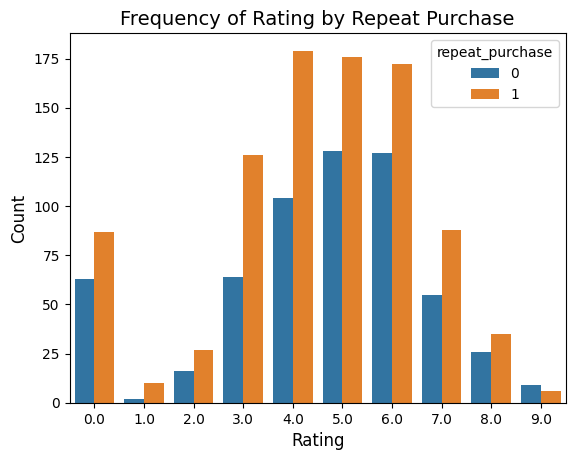

In [45]:
sns.countplot(x='rating',hue='repeat_purchase', data=data)
# Add labels and title to the chart
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Rating by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

The user buys more repeat_purchases on products which rates between 3 to 7.

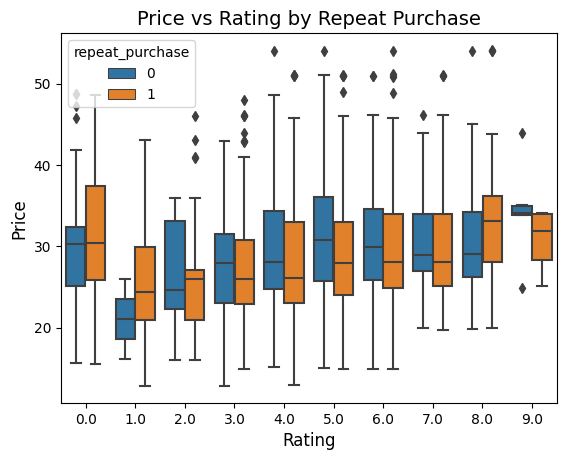

In [46]:
sns.boxplot(x='rating',y='price',hue='repeat_purchase', data=data)
# Add labels and title to the chart
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Rating by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

Price wise, the products rating in between 3 and 7 are also has extreme values of above 40 dollar.
So Foccusing on these price points for the product can increase the sales too.

In [37]:
data['rating_focus']=data['rating'].apply(lambda x : 1 if(x>=3 and x<=7) else 0)

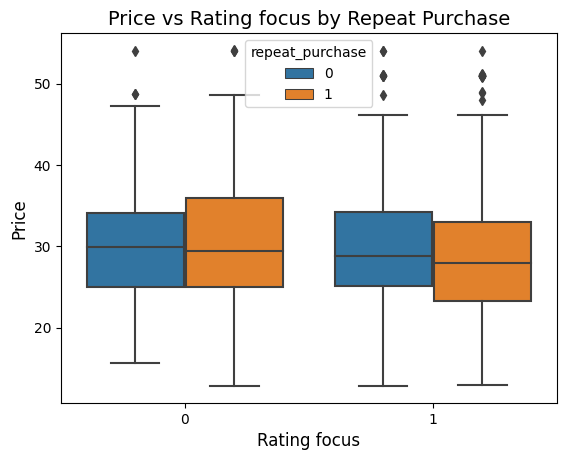

In [47]:
sns.boxplot(x='rating_focus',y='price',hue='repeat_purchase', data=data)
# Add labels and title to the chart
plt.xlabel('Rating focus', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Rating focus by Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

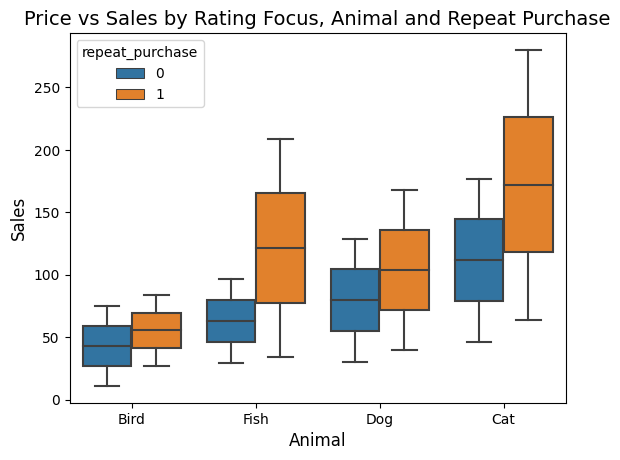

In [48]:
s=data.groupby(['rating_focus','animal','repeat_purchase'])['sales'].count().reset_index().sort_values(by='sales')
sns.boxplot(x='animal',y='sales',hue='repeat_purchase',data=s)
# Add labels and title to the chart
plt.xlabel('Animal', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Price vs Sales by Rating Focus, Animal and Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

Under our rating focus, the animal products fish, dog, cat inspite of low prices under these categories increases the sales to our company.The return purchases of these customers are more when compared with the non return purchase customers.

## Task 4

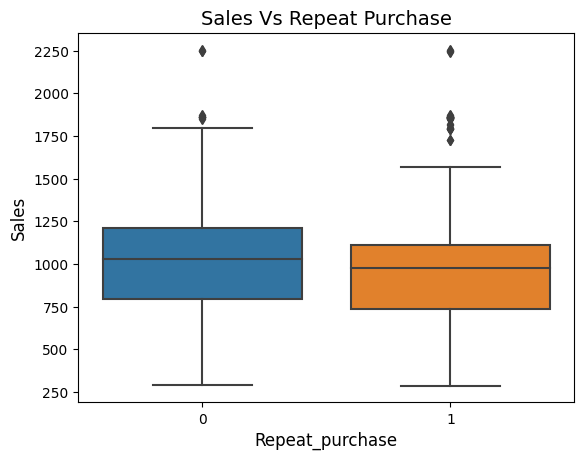

In [49]:
sns.boxplot(x='repeat_purchase',y='sales', data=data)
# Add labels and title to the chart
plt.xlabel('Repeat_purchase', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales Vs Repeat Purchase', fontsize=14)

# Show the chart
plt.show()

Inference,

We have to found the following analysis,

-> sales and price are linearly proportional to each other. So if the price is high, the sales of that product also high.

-> Ratings of products - 3 to 7 is highly liked by the repeat_purchase customers. Focussing on these groups will yield more increase in sales.

-> Size - the size prices are not feasible because medium sizes average is less than that of the small size products. We need to change the pricing of the sizes.

->Animal - prices of bird is high. But the repeat_purchase customers gives more important towards other animal products as it is cheap and the sales count is also high. Driving up the sales.The return purchases of these customers are more when compared with the non return purchase customers.

->Price - The customers maximum prefer products which has less than 30 dollar. When the volume of these customers increase the sales increases and return purchases also increases.

->categories - return purchases of the customers are mostly aligned with the categories except accessories. Given more importance to these categories will increase our sales.

Thus from the inference, the company can focussing on altering their strategy to specific fields which can increase in number of repeat customers.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam